In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import pandas_profiling as pp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('data/healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [7]:
#pp.ProfileReport(df)

In [8]:

#profile = pp.ProfileReport(df)
#profile.to_file("output.html")

In [9]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [10]:
df['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [11]:
df.drop(index=df[df['gender'] == 'Other'].index, inplace=True)

In [12]:
df['gender'].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [13]:
#Label encode gender column
#Male=0
#Female=1
df['gender']=df['gender'].map({'Male':0, 'Female':1})

In [14]:
df['ever_married'].value_counts()

Yes    3204
No     1704
Name: ever_married, dtype: int64

In [15]:
#Label encode ever_married column
#Yes=0
#No=1
df['ever_married']=df['ever_married'].map({'Yes':0, 'No':1})

In [16]:
df['work_type'].value_counts()

Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [17]:
#Label encode work_type column
#Private=0
#Self-employed=1
#Children=2
#Govt_job=3
#Never_worked=4
df['work_type']=df['work_type'].map({'Private':0, 'Self-employed':1, 'children':2, 'Govt_job':3, 'Never_worked':4})

In [18]:
df['Residence_type'].value_counts()

Urban    2490
Rural    2418
Name: Residence_type, dtype: int64

In [19]:
#Label encode Residence_type column
#Urban=0
#Rural=1
df['Residence_type']=df['Residence_type'].map({'Urban':0, 'Rural':1})

In [20]:
df['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [21]:
#Label encode smoking_status column
#never smoked=0
#Unknown=1
#formerly smoked=2
#smokes=3
df['smoking_status']=df['smoking_status'].map({'never smoked':0, 'Unknown':1, 'formerly smoked':1, 'smokes':1})

In [22]:
#profile = pp.ProfileReport(df)
#profile.to_file("output_processed.html")

In [23]:
df.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000,4908.000000
mean,37060.423594,0.590261,42.868810,0.091891,0.049511,0.347188,0.834352,0.492665,105.297402,28.89456,0.622657,0.042584
std,20995.468407,0.491836,22.556128,0.288901,0.216954,0.476125,1.111689,0.499997,44.425550,7.85432,0.484771,0.201937
min,77.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.30000,0.000000,0.000000
25%,18602.500000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.067500,23.50000,0.000000,0.000000
50%,37580.500000,1.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.680000,28.10000,1.000000,0.000000
75%,55181.750000,1.000000,60.000000,0.000000,0.000000,1.000000,2.000000,1.000000,113.495000,33.10000,1.000000,0.000000
max,72940.000000,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.60000,1.000000,1.000000


In [24]:
df['age'].value_counts()

57.00    93
78.00    93
52.00    85
54.00    84
55.00    83
         ..
1.40      3
0.16      3
0.08      2
0.48      2
0.40      2
Name: age, Length: 104, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Density'>

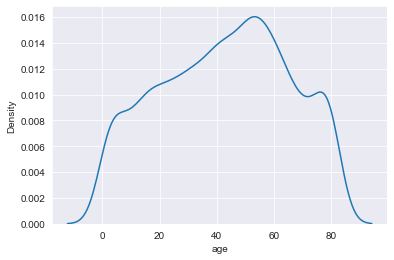

In [25]:
sns.set_style('darkgrid')
sns.kdeplot(df['age'])

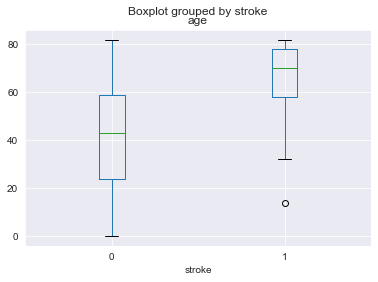

In [26]:
boxplot = df.boxplot(column=['age'], by='stroke')

In [27]:
df = df[df.age > 15]
df.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4181.000000,4181.000000,4181.000000,4181.000000,4181.000000,4181.000000,4181.000000,4181.000000,4181.000000,4181.000000,4181.000000,4181.000000
mean,37194.255920,0.610380,49.036833,0.107869,0.057881,0.233676,0.652715,0.492466,107.215932,30.359842,0.577613,0.049749
std,20987.527253,0.487722,18.343691,0.310252,0.233546,0.423219,1.083339,0.500003,46.538214,7.327089,0.493999,0.217452
min,84.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.300000,0.000000,0.000000
25%,18888.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.290000,25.300000,0.000000,0.000000
50%,37726.000000,1.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92.060000,29.100000,1.000000,0.000000
75%,55351.000000,1.000000,63.000000,0.000000,0.000000,0.000000,1.000000,1.000000,114.920000,34.100000,1.000000,0.000000
max,72918.000000,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,1.000000,1.000000


In [28]:
df['work_type'].value_counts()

0    2761
1     767
3     628
4      14
2      11
Name: work_type, dtype: int64

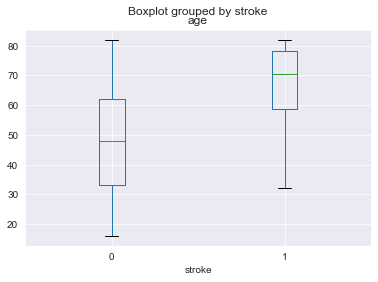

In [29]:
boxplot = df.boxplot(column=['age'], by='stroke')

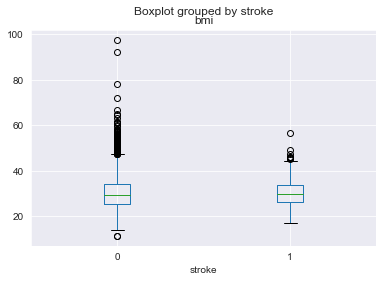

In [30]:
boxplot = df.boxplot(column=['bmi'], by='stroke')

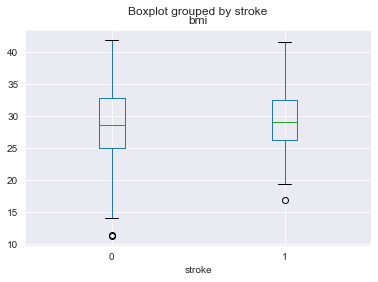

In [31]:
df = df[df.bmi < 42]
boxplot = df.boxplot(column=['bmi'], by='stroke')

In [32]:
cols_to_drop=['id', 'stroke']

In [33]:
# Separating features and target variable
X = df.drop(cols_to_drop, axis=1)

In [34]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,0,0,0,228.69,36.6,1
2,0,80.0,0,1,0,0,1,105.92,32.5,0
3,1,49.0,0,0,0,0,0,171.23,34.4,1
4,1,79.0,1,0,0,1,1,174.12,24.0,0
5,0,81.0,0,0,0,0,0,186.21,29.0,1


In [35]:
#sc = MinMaxScaler(feature_range=(0,1))
sc = StandardScaler()
X_scaled = sc.fit_transform(X)


In [36]:
y = df['stroke']

In [37]:
X_train_imb, X_test, y_train_imb, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 79)
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train_imb, y_train_imb)

              precision    recall  f1-score   support

           0       0.98      0.70      0.82       926
           1       0.11      0.73      0.19        48

    accuracy                           0.70       974
   macro avg       0.55      0.72      0.51       974
weighted avg       0.94      0.70      0.79       974

Cross-validation scores with 5 folds:

precision: 0.74
recall: 0.88
f1: 0.8


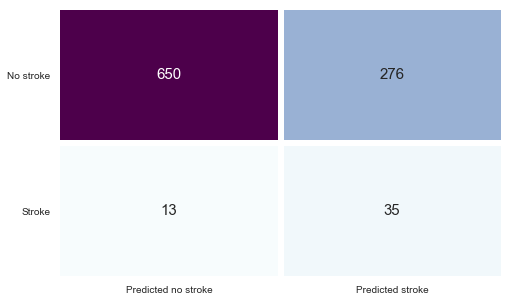

In [38]:
rf = RandomForestClassifier(random_state = 79, max_depth = 4, n_estimators=150)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

print('Cross-validation scores with 5 folds:')
print('')
print(f"precision: {round(cross_val_score(rf, X_train, y_train, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(rf, X_train, y_train, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(rf, X_train, y_train, cv = 5, scoring = 'f1').mean(), 2)}")

# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(rf_cm, cmap = 'BuPu', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

Feature ranking:
1. feature 1 (0.535151)
2. feature 4 (0.137701)
3. feature 7 (0.101868)
4. feature 5 (0.085074)
5. feature 3 (0.044015)
6. feature 2 (0.043006)
7. feature 8 (0.017001)
8. feature 0 (0.016614)
9. feature 9 (0.013614)
10. feature 6 (0.005955)


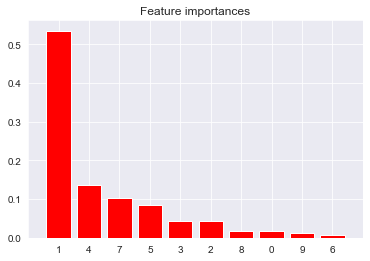

In [39]:
importances = rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [41]:
# saving model as a pickle
import pickle
pickle.dump(rf,open("models/stroke_pred.pkl", "wb"))
pickle.dump(sc, open("models/scaler.pkl", "wb"))

In [44]:
import os
cwd = os.getcwd()
concat_path = os.path.join(cwd, "eda.ipynb")
print(concat_path)

/home/antigonus/Personal/GitProjects/stroke-prediction-django-deployment/eda.ipynb
